In [34]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
sys.path.append('..')
from helper import *

setwd()
Objects = Objects()

In [36]:
id="housing"
con = duckdb.connect(database="data/trusted/db_{}.db".format(id), read_only=True)
df = con.execute("SELECT * FROM {}".format(id)).fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7fb727334b70>>

In [37]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7032291976,https://bgky.craigslist.org/apa/d/bowling-gree...,bowling green,https://bgky.craigslist.org,669.0,apartment,660.0,1,1.0,Yes,...,No,0,No,laundry on site,off-street parking,https://images.craigslist.org/00707_i9k7aSFQHO...,Check out what The Enclave has to offer great ...,36.9917,-86.4230,ky
1,7032055732,https://bgky.craigslist.org/apa/d/bowling-gree...,bowling green,https://bgky.craigslist.org,827.0,apartment,777.0,1,1.0,Yes,...,No,0,Yes,unknow,unknow,https://images.craigslist.org/00e0e_9LAf3EWK7j...,Join us December 19th for our Christmas specta...,36.9745,-86.4199,ky
2,7031712723,https://bgky.craigslist.org/apa/d/bowling-gree...,bowling green,https://bgky.craigslist.org,1027.0,apartment,1014.0,2,2.0,Yes,...,No,0,No,unknow,unknow,https://images.craigslist.org/00d0d_7STfygeDsX...,The Fairways at Hartland is thoughtfully place...,36.9745,-86.4199,ky
3,7031706429,https://bgky.craigslist.org/apa/d/bowling-gree...,bowling green,https://bgky.craigslist.org,1027.0,apartment,1200.0,3,2.0,Yes,...,No,0,No,unknow,unknow,https://images.craigslist.org/00j0j_dMMmRKGjSY...,The Fairways at Hartland is thoughtfully place...,36.9745,-86.4199,ky
4,7031704380,https://bgky.craigslist.org/apa/d/bowling-gree...,bowling green,https://bgky.craigslist.org,1227.0,apartment,1468.0,3,2.0,Yes,...,No,0,No,unknow,unknow,https://images.craigslist.org/00K0K_iaXsLQdxrK...,The Fairways at Hartland is thoughtfully place...,36.9745,-86.4199,ky


In [38]:
numeric_description(df)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
id,7.040982e+09,8.800376e+06,7.003808e+09,7.035979e+09,7.043320e+09,7.048426e+09,7.051292e+09,0.0,0.00
price,8.872830e+03,4.474093e+06,5.000000e+00,8.100000e+02,1.040000e+03,1.399000e+03,2.768307e+09,2044.0,0.53
sqfeet,1.060577e+03,1.915686e+04,3.000000e+00,7.500000e+02,9.500000e+02,1.150000e+03,8.388607e+06,246.0,0.06
beds,1.905345e+00,3.494572e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.100000e+03,0.0,0.00
baths,1.480718e+00,6.180605e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.500000e+01,0.0,0.00
electric_vehicle_charge,1.287090e-02,1.127177e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.00
lat,3.723349e+01,5.546171e+00,-4.353330e+01,3.345470e+01,3.764780e+01,4.113830e+01,1.020360e+02,1918.0,0.50
long,-9.270063e+01,1.653198e+01,-1.638940e+02,-1.007750e+02,-8.774510e+01,-8.117960e+01,1.726330e+02,1918.0,0.50


In [39]:
description_categorical(df)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,url,384977,https://zanesville.craigslist.org/apa/d/zanesv...,https://abilene.craigslist.org/apa/d/2-br/7028...,0,0.00
1,region,404,"jacksonville (4246, 1.1)","kansas city (3, 0.0)",0,0.00
2,region_url,413,"https://fredericksburg.craigslist.org (2747, 0...","https://bigbend.craigslist.org (9, 0.0)",0,0.00
3,type,12,"apartment (318032, 82.61)","assisted living (2, 0.0)",0,0.00
4,cats_allowed,2,"Yes (279836, 72.69)","No (105141, 27.31)",0,0.00
5,dogs_allowed,2,"Yes (272532, 70.79)","No (112445, 29.21)",0,0.00
6,smoking_allowed,2,"Yes (281715, 73.18)","No (103262, 26.82)",0,0.00
7,wheelchair_access,2,"No (353366, 91.79)","Yes (31611, 8.21)",0,0.00
8,comes_furnished,2,"No (366449, 95.19)","Yes (18528, 4.81)",0,0.00
9,laundry_options,6,"w/d in unit (131783, 34.23)","no laundry on site (3624, 0.94)",79026,20.53


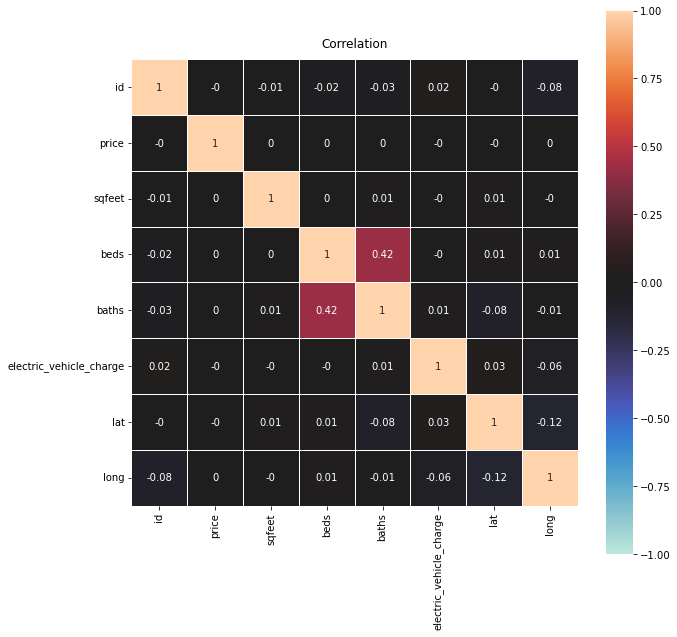

In [40]:
correlation(df)

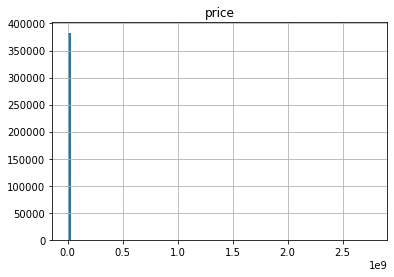

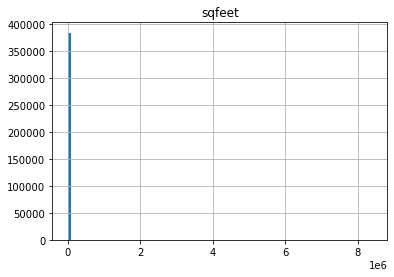

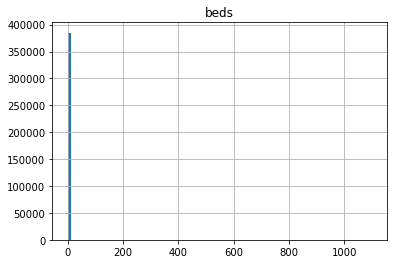

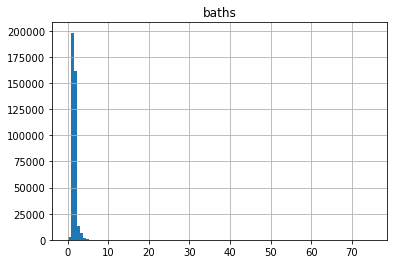

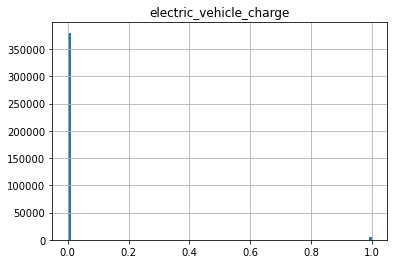

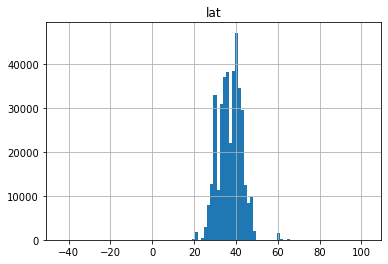

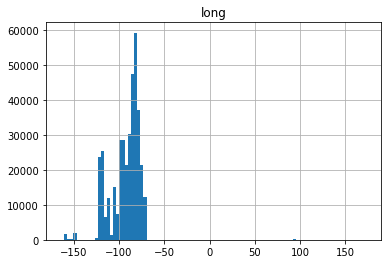

In [41]:
hist(df, bins=100)

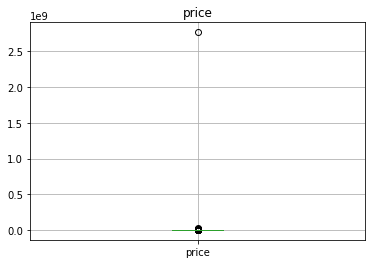

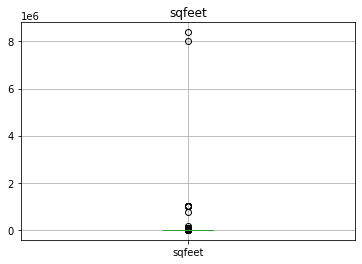

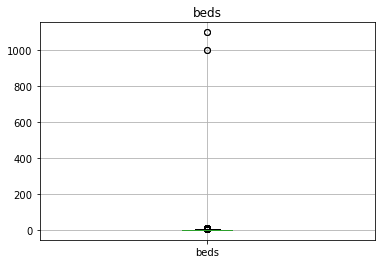

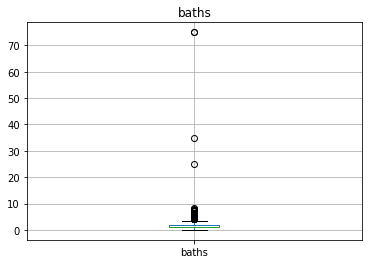

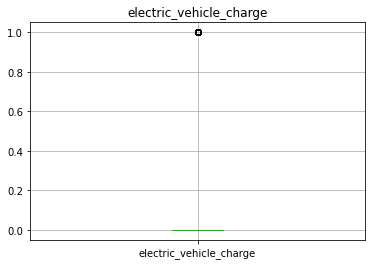

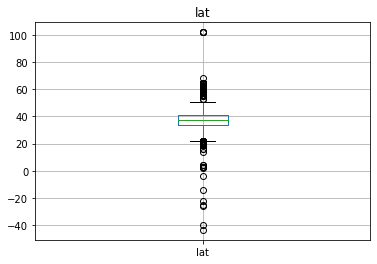

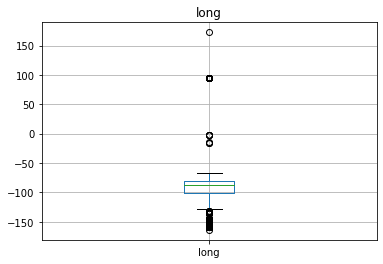

In [42]:
boxplot(df)

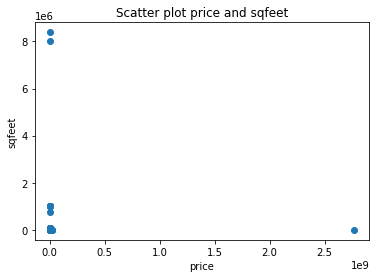

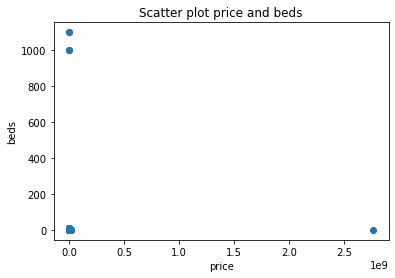

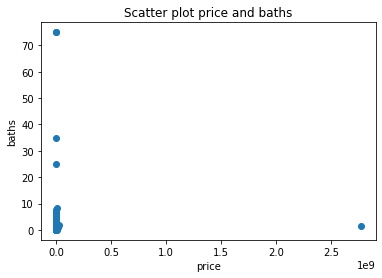

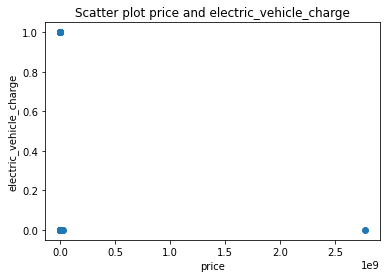

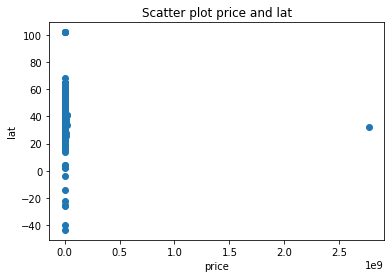

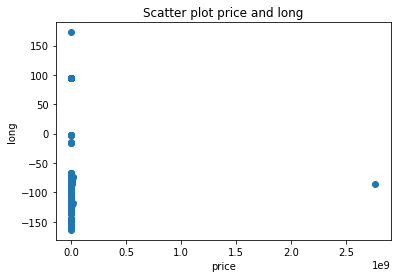

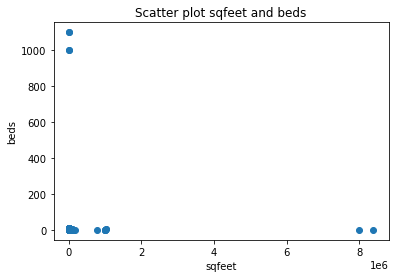

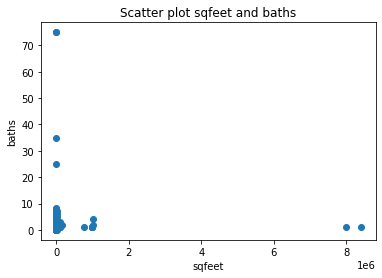

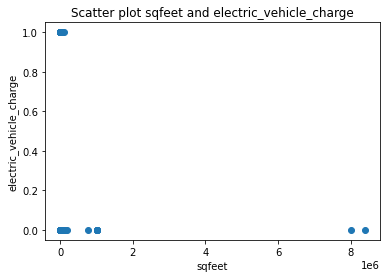

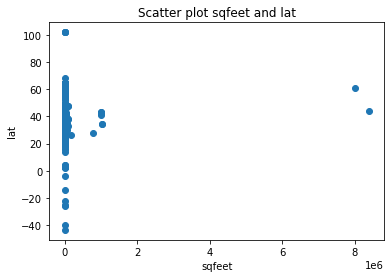

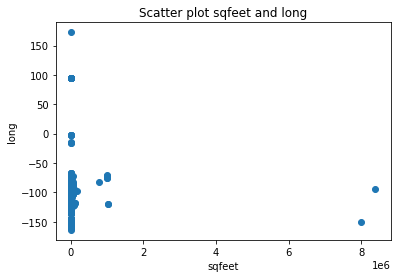

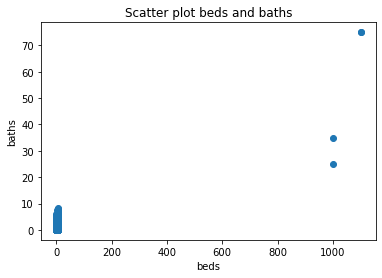

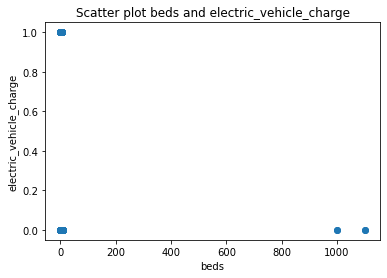

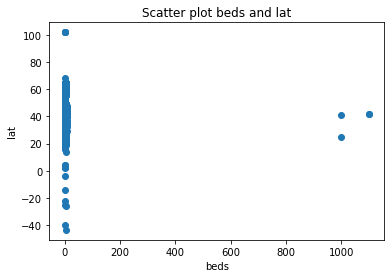

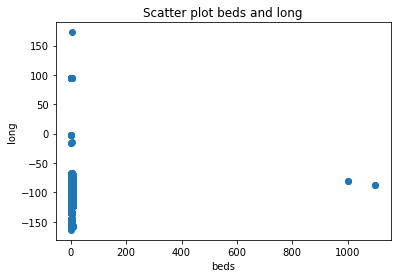

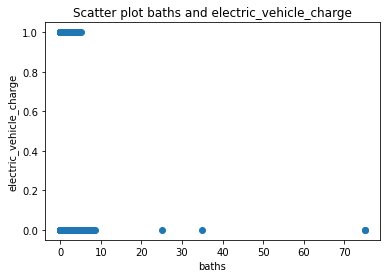

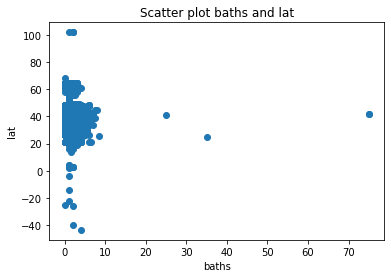

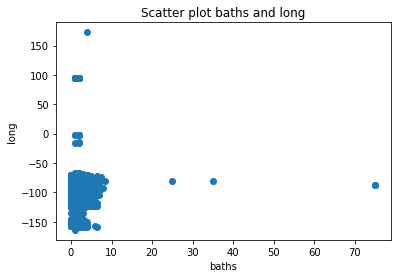

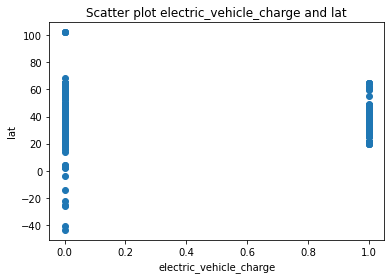

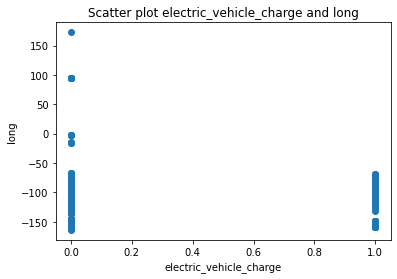

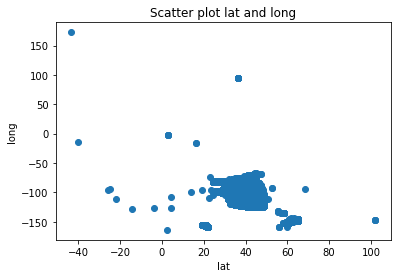

In [43]:
scatter(df)

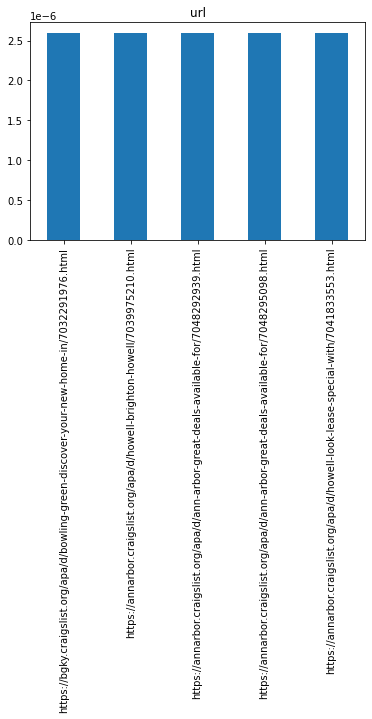

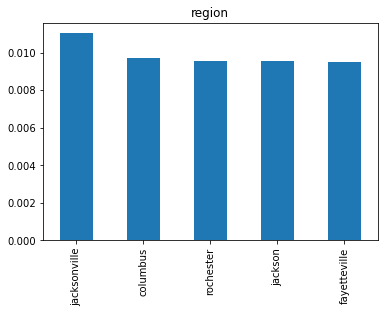

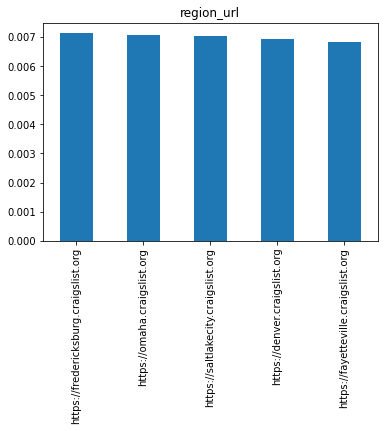

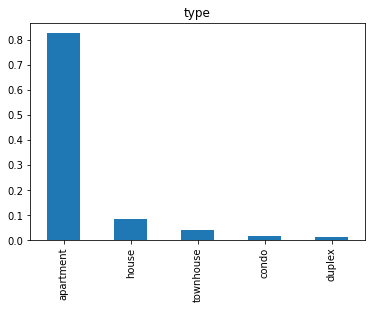

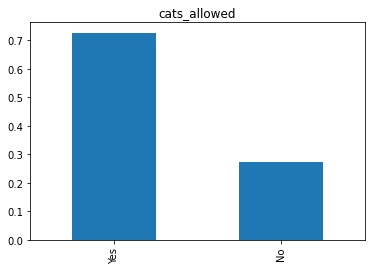

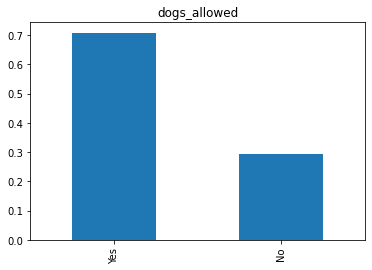

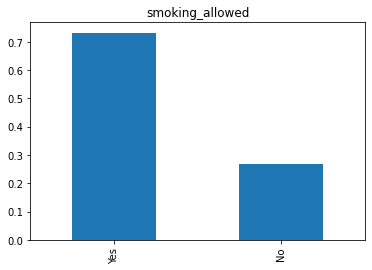

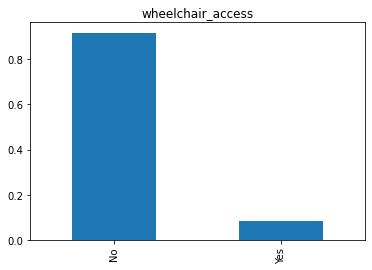

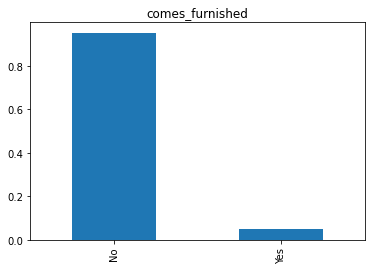

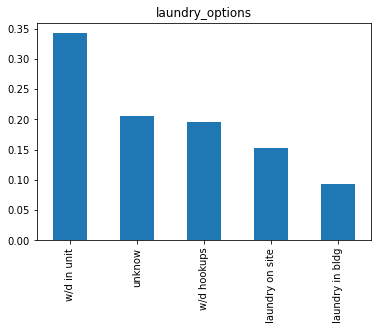

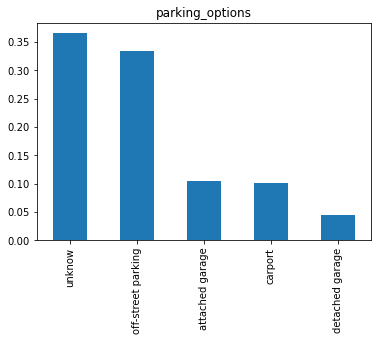

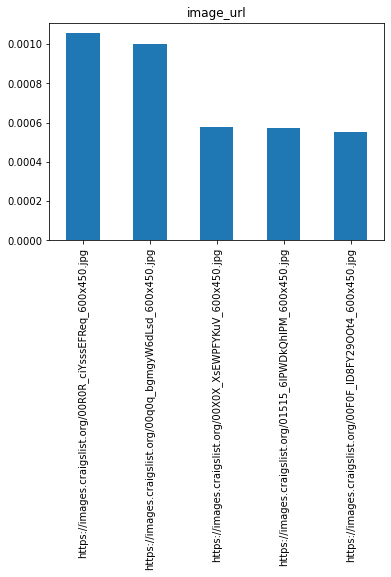

Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x80' [U+80], substituting with a dummy symbol.


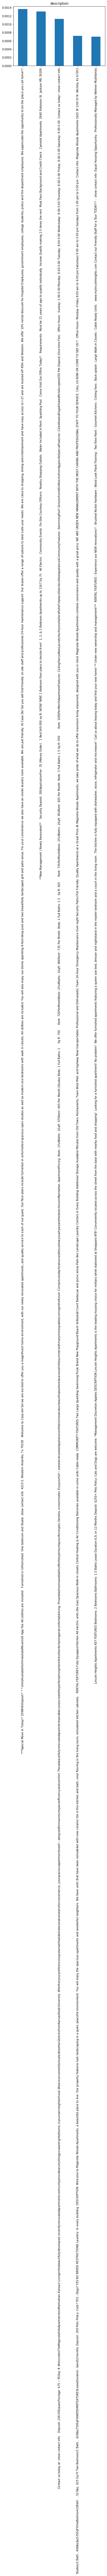

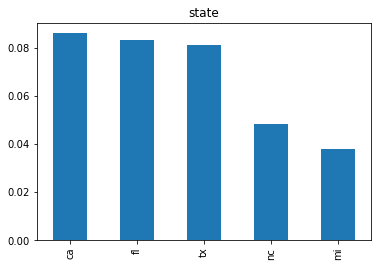

In [44]:
barplot(df,top=5,freq=True)